In [ ]:
# Código que teríamos usado se optássemos por importar os dados diretamente do BigQuery.
#No entanto, decidimos armazenar os dados no GitHub e importá-los de lá por ser mais rápido.
#Além deste código, seria necessário fazer o upload da credencial para o ambiente do Colab. A credencial é um arquivo .json chamado "credencial".

#import pandas as pd #Conexão com BigQuery pelo Pandas
#from google.oauth2 import service_account #Conexão com Google Cloud
#from google.cloud import bigquery
#!pip install pandas_gbq
#pip install --upgrade pandas_gbq
#query09 = '''SELECT *
#FROM `basedosdados.br_ibge_pnad_covid.microdados`
#where mes = 9
#'''
#query10 = '''SELECT *
#FROM `basedosdados.br_ibge_pnad_covid.microdados`
#where mes = 10
#'''
#query11 = '''SELECT *
#FROM `basedosdados.br_ibge_pnad_covid.microdados`
#where mes = 11
#'''

#Relembrando: é necessário importar para o ambiente do colab a credencial que é um arquivo .json chamado "credencial"
#credentials = service_account.Credentials.from_service_account_file(filename='credencial.json', scopes=['https://www.googleapis.com/auth/cloud-platform'])
#df_mes9 = pd.read_gbq(credentials=credentials, query=query09)
#df_mes10 = pd.read_gbq(credentials=credentials, query=query10)
#df_mes11 = pd.read_gbq(credentials=credentials, query=query11)

# Importando dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
url_pnad_09 =  'https://github.com/soareslaio/Tech-Challenge-Analise-Comportamento-COVID-19/blob/main/Dados%20Parquet/PNAD_COVID_092020.parquet?raw=true'
url_pnad_10 = 'https://github.com/soareslaio/Tech-Challenge-Analise-Comportamento-COVID-19/blob/main/Dados%20Parquet/PNAD_COVID_102020.parquet?raw=true'
url_pnad_11 = 'https://github.com/soareslaio/Tech-Challenge-Analise-Comportamento-COVID-19/raw/main/Dados%20Parquet/PNAD_COVID_112020.parquet'


In [52]:
df_pnad_09 = pd.read_parquet(url_pnad_09, engine='auto')
df_pnad_10 = pd.read_parquet(url_pnad_10, engine='auto')
df_pnad_11 = pd.read_parquet(url_pnad_11, engine='auto')


In [33]:
df_pnad_covid = pd.concat([df_pnad_09,df_pnad_10,df_pnad_11])

# Definindo Funções

##Funções para facilitar EDA

In [48]:
# Analisando como estão os dados de forma geral
def eda (df):
  #Verifica o numero de linhas e colunas
  df_linhas = df.shape[0]
  df_colunas = df.shape[1]
  print(f"O Numero de linhas: {df_linhas}\nO Numero de colunas: {df_colunas}")

  #Puxa informações Gerais do DF
  print("\nInformações do DF:\n")
  info = df.info()

  #Verifica valores nulos no geral
  nulos = df.isnull().sum().sum()
  print("\nValores Nulo no geral:", nulos)

  #Verifica valores nulos no detalhe
  nulos = df.isnull().sum()
  print("\nValores Nulo:\n", nulos)

  #Verifica valores dupicados
  duplicados = df.duplicated().sum()
  print("\nDados Duplicados:", duplicados)

  #Quantidade dados unicos
  unicos = df.nunique().sum()
  print("\n Dados Unicos:", unicos)

# Tratando os dados
def etl (df):
  return df.fillna(-1)

# Filtrando e plotando alguns graficos para entedimento dos DataFrames
def eda_filtro_colunas (df):

#Gerando lista das colunas desejadas
  colunas_demograficos = [
        'Ano', 'UF', 'CAPITAL', 'RM_RIDE', 'V1008', 'V1012', 'V1013', 'V1016',
        'Estrato', 'UPA', 'V1022', 'V1023', 'V1030', 'V1031', 'V1032', 'posest',
        'A001', 'A001A', 'A001B1', 'A001B2', 'A001B3', 'A002', 'A003', 'A004',
        'A005', 'A006', 'A006A', 'A006B', 'A007', 'A007A', 'A008', 'A009','B009B','B009D','B009F'
       ]


  df_filtrado = df[colunas_demograficos]

  return df_filtrado

def eda_filtro_covid(df):

  df_covid = df[(df['B009B'] == 1) | (df['B009D'] == 1) | (df['B009F'] == 1)] # FIltrando só pessoas que tiveram covid

  return df_covid


##Plots para df concatenado

In [10]:
def plot_tipo_domicilio_sumarizado(df):
    df['V1022'] = df['V1022'].map({1: 'Urbana', 2: 'Rural'})
    contagem_tipo_domicilio = df['V1022'].value_counts()

    explode = (0.1, 0)
    cores = ['#DBF227', '#D6D58E']

    plt.figure(figsize=(8, 8))
    plt.pie(contagem_tipo_domicilio, labels=contagem_tipo_domicilio.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=cores)
    plt.title('Distribuição por Tipo de Moradia')
    plt.axis('equal')
    plt.show()

def contagem_genero_sumarizado(df):
    df['A003'] = df['A003'].map({1: 'Homem', 2: 'Mulher'})
    contagem_genero = df['A003'].value_counts()

    explode = (0.1, 0)
    cores = ['#DBF227', '#D6D58E']

    plt.figure(figsize=(8, 8))
    plt.pie(contagem_genero, labels=contagem_genero.index, autopct='%1.1f%%', startangle=140,explode=explode, colors=cores)
    plt.title('Distribuição por Gênero')
    plt.axis('equal')
    plt.show()

def tipo_area_sumarizado(df):
    df['V1023'] = df['V1023'].map({1: 'Capital', 2: 'Resto da RM', 3: 'Resto da Ride'})
    tipo_area = df['V1023'].value_counts()
    tipo_area = tipo_area.sort_index()
    plt.figure(figsize=(10, 6))
    tipo_area.plot(kind='barh', color='darkcyan', edgecolor='black')
    plt.title('Distribuição Tipo de Área')
    plt.xlabel('Frequência')
    plt.ylabel('Tipo de Área')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.5)
    plt.grid(False)
    plt.show()

def distribuicao_idade_sumarizado(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['A002'], bins=range(0, 110, 10), color='darkcyan', edgecolor='black')
    plt.title('Distribuição por Idade (Intervalos de 10 meses)')
    plt.xlabel('Idade')
    plt.ylabel('Frequência')

    plt.xticks(range(0, 110, 10))

    #plt.grid(axis='y', alpha=0.75)
    plt.grid(False)
    plt.show()

def distribuicao_genero_sumarizado(df):
    df['A003'] = df['A003'].map({1: 'Homem', 2: 'Mulher'})
    contagem_genero = df['A003'].value_counts()

    explode = (0.1, 0)
    cores = ['#DBF227', '#D6D58E']

    plt.figure(figsize=(8, 8))
    plt.pie(contagem_genero, labels=contagem_genero.index, autopct='%1.1f%%', startangle=140,explode=explode, colors=cores)
    plt.title('Distribuição por Gênero')
    plt.axis('equal')
    plt.show()

def distribuicao_cor_ou_raca_sumarizado(df):
    df['A004'] = df['A004'].map({1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Ignorado'})
    contagem_cor_raca = df['A004'].value_counts()
    contagem_cor_raca_sorted = contagem_cor_raca.sort_index()

    plt.figure(figsize=(10, 6))
    contagem_cor_raca_sorted.plot(kind='bar', color='darkcyan', edgecolor='black')
    plt.title('Distribuição por Cor ou Raça')
    plt.xlabel('')
    plt.ylabel('Frequência')
    plt.xticks(rotation=0)
    plt.grid(False)
    plt.show()

def distribuicao_escolaridade_sumarizado(df):
    df['A005'] = df['A005'].map({1: 'Sem instrução', 2: 'Fundamental incompleto', 3: 'Fundamental completa', 4: 'Médio incompleto', 5: 'Médio completo', 6: 'Superior incompleto', 7:'Superior completo',8:'Pós-graduação, mestrado ou doutorado'})
    escolaridade = df['A005'].value_counts()
    escolaridade = escolaridade.sort_index()

    plt.figure(figsize=(10, 6))
    escolaridade.plot(kind='barh', color='darkcyan', edgecolor='black')
    plt.title('Distribuição por escolaridade')
    plt.xlabel('Frequência')
    plt.ylabel('')
    plt.xticks(rotation=0)
    plt.grid(False)
    plt.show()

def distribuicao_frequencia_escolar_sumarizado(df):
    df = df.loc[df['A006'] > -1] #Excluindo não aplicavel da consulta
    df['A006'] = df['A006'].map({1: 'Sim', 2: 'Não'})
    contagem_genero = df['A006'].value_counts()

    explode = (0.1, 0)
    cores = ['#DBF227', '#D6D58E']

    plt.figure(figsize=(8, 8))
    plt.pie(contagem_genero, labels=contagem_genero.index, autopct='%1.1f%%', startangle=140,explode=explode, colors=cores)
    plt.title('Frequentou a escola?')
    plt.axis('equal')
    plt.show()

def distribuicao_tipo_aulas_sumarizado(df):
    df = df.loc[df['A006B'] > -1] #Excluindo não aplicavel da consulta
    df['A006B'] = df['A006B'].map({1: 'Normalmente', 2: 'Parcialmente', 3: 'Presencial/Semipresencial', 4: 'Curso Online'})
    frequencia_escola = df['A006B'].value_counts()
    frequencia_escola_sorted = frequencia_escola.sort_index()
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    frequencia_escola.plot(kind='barh', color='darkcyan', edgecolor='black')
    plt.title('Aulas Presenciais?')
    plt.xlabel('Frequência')
    plt.ylabel('')
    plt.xticks(rotation=0)
    plt.grid(False)

    for i in ax.patches:
        ax.text(i.get_width() + 0.1, i.get_y() + 0.1, f"{i.get_width() / frequencia_escola.sum() * 100:.1f}%", color='black')


    plt.show()


##Pltos para df subplots

In [51]:
def plot_tipo_domicilio_subplots(df_pnad_09, df_pnad_10, df_pnad_11):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    dfs = [df_pnad_09, df_pnad_10, df_pnad_11]
    mes = [202009, 202010, 202011]

    for i, (df, ano) in enumerate(zip(dfs, mes)):
        ax = axs[i]
        df['V1022'] = df['V1022'].map({1: 'Urbana', 2: 'Rural'})
        contagem_tipo_domicilio = df['V1022'].value_counts()

        explode = (0.1, 0)
        cores = ['#DBF227', '#D6D58E']

        ax.pie(contagem_tipo_domicilio, labels=contagem_tipo_domicilio.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=cores)
        ax.set_title(f'Distribuição por Tipo de Moradia ({ano})')
        ax.axis('equal')

    plt.tight_layout()
    plt.show()

def contagem_genero_subplots(df_pnad_09, df_pnad_10, df_pnad_11):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    dfs = [df_pnad_09, df_pnad_10, df_pnad_11]
    meses = [202009, 202010, 202011]

    for i, (df, ano) in enumerate(zip(dfs, meses)):
        ax = axs[i]
        df['A003'] = df['A003'].map({1: 'Homem', 2: 'Mulher'})
        contagem_genero = df['A003'].value_counts()

        explode = (0.1, 0)
        cores = ['#DBF227', '#D6D58E']

        ax.pie(contagem_genero, labels=contagem_genero.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=cores)
        ax.set_title(f'Distribuição por Gênero ({ano})')
        ax.axis('equal')

    plt.tight_layout()
    plt.show()

def tipo_area_subplots(df_pnad_09, df_pnad_10, df_pnad_11):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    dfs = [df_pnad_09, df_pnad_10, df_pnad_11]
    meses = [202009, 202010, 202011]

    for i, (df, ano) in enumerate(zip(dfs, meses)):
        ax = axs[i]
        df['V1023'] = df['V1023'].map({1: 'Capital', 2: 'Resto da RM', 3: 'Resto da Ride'})
        tipo_area = df['V1023'].value_counts()
        tipo_area = tipo_area.sort_index()

        ax.barh(tipo_area.index, tipo_area.values, color='darkcyan', edgecolor='black')
        ax.set_title(f'Distribuição Tipo de Área ({ano})')
        ax.set_xlabel('Frequência')
        ax.set_ylabel('Tipo de Área')
        # ax.set_xticks(range(0, 110, 10))
        ax.tick_params(axis='y', labelrotation=0)
        # ax.grid(axis='y', alpha=0.5)
        ax.grid(False)

        # Adiciona a porcentagem em cada barra
        total = tipo_area.sum()
        for j, value in enumerate(tipo_area.values):
            percent = 100 * value / total
            ax.text(value, j, f'{percent:.1f}%', ha='left', va='center')

    plt.tight_layout()
    plt.show()

def distribuicao_idade_subplots(df_pnad_09, df_pnad_10, df_pnad_11):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    dfs = [df_pnad_09, df_pnad_10, df_pnad_11]
    meses = [202009, 202010, 202011]

    for i, (df, ano) in enumerate(zip(dfs, meses)):
        ax = axs[i]
        ax.hist(df['A002'], bins=range(0, 110, 10), color='darkcyan', edgecolor='black')

        # Adicionando porcentagem em cada barra do histograma
        n, bins, patches = ax.hist(df['A002'], bins=range(0, 110, 10), color='darkcyan', edgecolor='black')
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        for count, x in zip(n, bin_centers):
            percent = '%0.0f%%' % (100 * float(count) / df['A002'].count())
            ax.text(x, count + 10, percent, ha='center', color='black')

        ax.set_title(f'Distribuição por Idade (Intervalos de 10 meses) ({ano})')
        ax.set_xlabel('Idade')
        ax.set_ylabel('Frequência')
        ax.set_xticks(range(0, 110, 10))
        ax.grid(False)

    plt.tight_layout()
    plt.show()


def distribuicao_cor_ou_raca_subplots(df_pnad_09, df_pnad_10, df_pnad_11):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    dfs = [df_pnad_09, df_pnad_10, df_pnad_11]
    meses = [202009, 202010, 202011]

    for i, (df, ano) in enumerate(zip(dfs, meses)):
        ax = axs[i]
        df['A004'] = df['A004'].map({1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Ignorado'})
        contagem_cor_raca = df['A004'].value_counts()
        contagem_cor_raca_sorted = contagem_cor_raca.sort_index()

        ax.bar(contagem_cor_raca_sorted.index, contagem_cor_raca_sorted.values, color='darkcyan', edgecolor='black')
        ax.set_title(f'Distribuição por Cor ou Raça ({ano})')
        ax.set_xlabel('')
        ax.set_ylabel('Frequência')
        ax.tick_params(axis='x', labelrotation=0)
        ax.grid(False)

        total = contagem_cor_raca_sorted.sum()
        for j, value in enumerate(contagem_cor_raca_sorted.values):
            percent = 100 * value / total
            ax.text(j, value, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

def distribuicao_escolaridade_subplots(df_pnad_09, df_pnad_10, df_pnad_11):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    dfs = [df_pnad_09, df_pnad_10, df_pnad_11]
    meses = [202009, 202010, 202011]

    for i, (df, ano) in enumerate(zip(dfs, meses)):
        ax = axs[i]
        df['A005'] = df['A005'].map({1: 'Sem instrução', 2: 'Fundamental incompleto', 3: 'Fundamental completa', 4: 'Médio incompleto', 5: 'Médio completo', 6: 'Superior incompleto', 7:'Superior completo',8:'Pós-graduação, mestrado ou doutorado'})
        escolaridade = df['A005'].value_counts()
        escolaridade = escolaridade.sort_index()

        ax.barh(escolaridade.index, escolaridade.values, color='darkcyan', edgecolor='black')
        ax.set_title(f'Distribuição por escolaridade ({ano})')
        ax.set_xlabel('Frequência')
        ax.set_ylabel('')
        ax.tick_params(axis='x', labelrotation=45)
        ax.grid(False)

        total = escolaridade.sum()
        for j, value in enumerate(escolaridade.values):
            percent = 100 * value / total
            ax.text(value, j, f'{percent:.1f}%', ha='left', va='center', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

def distribuicao_frequencia_escolar_subplots(df_pnad_09, df_pnad_10, df_pnad_11):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    dfs = [df_pnad_09, df_pnad_10, df_pnad_11]
    meses = [202009, 202010, 202011]

    for i, (df, ano) in enumerate(zip(dfs, meses)):
        ax = axs[i]
        df = df.loc[df['A006'] > -1] #Excluindo não aplicavel da consulta
        df['A006'] = df['A006'].map({1: 'Sim', 2: 'Não'})
        contagem_genero = df['A006'].value_counts()

        explode = (0.1, 0)
        cores = ['#DBF227', '#D6D58E']

        ax.pie(contagem_genero, labels=contagem_genero.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=cores)
        ax.set_title(f'Frequentou a escola? ({ano})')
        ax.axis('equal')

    plt.tight_layout()
    plt.show()


# Aplicando ETL

In [36]:
#Aplicando filtros ao DF concatenado
df_pnad_covid = eda_filtro_colunas(df_pnad_covid)
df_pnad_covid = eda_filtro_covid(df_pnad_covid)

In [53]:
df_pnad_09 = etl(df_pnad_09)
df_pnad_10 = etl(df_pnad_10)
df_pnad_11 = etl(df_pnad_11)


# Visualizações exploratoria

In [38]:
df_pnad_covid['V1022'].value_counts()

V1022
1    28585
2     4337
Name: count, dtype: int64

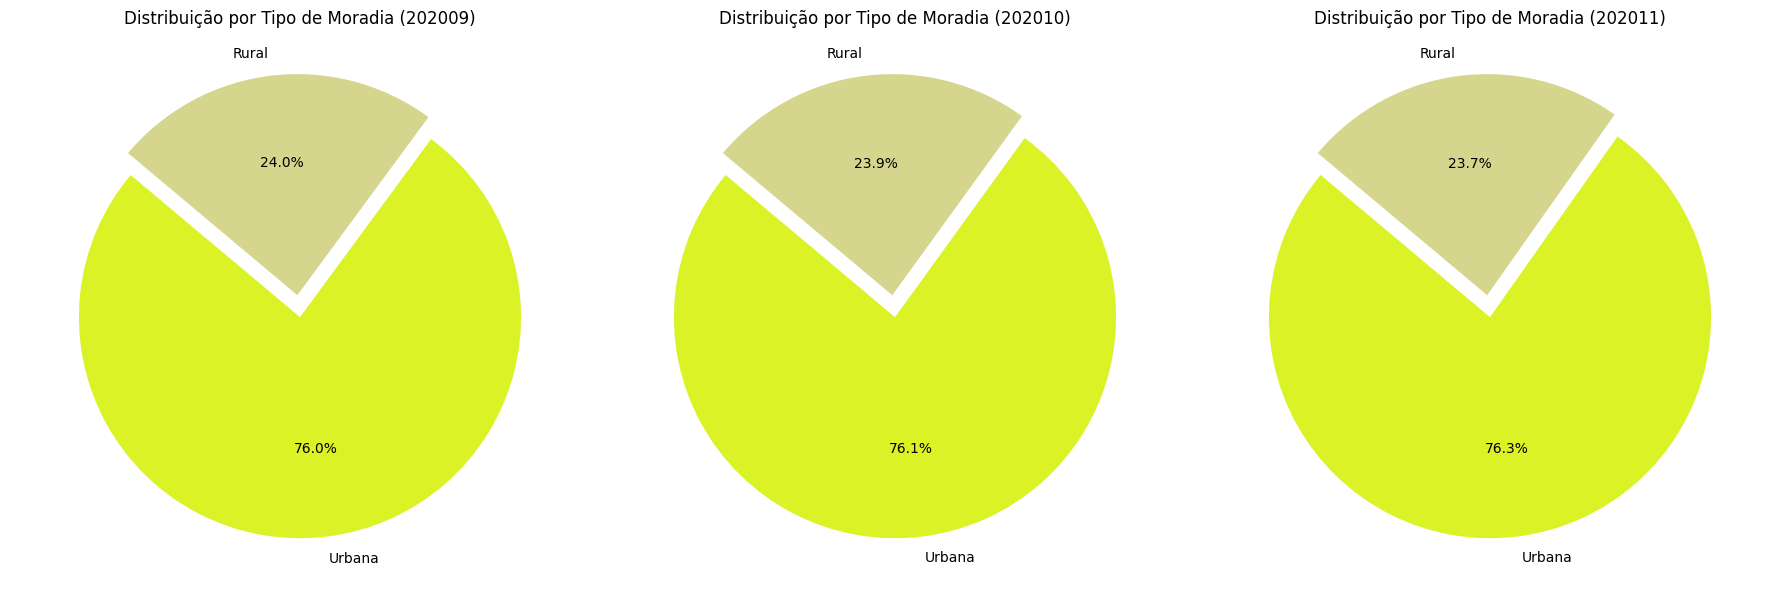

In [39]:
plot_tipo_domicilio_subplots(df_pnad_09, df_pnad_10, df_pnad_11)

In [23]:
df_pnad_covid['V1023'].value_counts()

V1023
Capital          10869
Resto da RM       4054
Resto da Ride      567
Name: count, dtype: int64

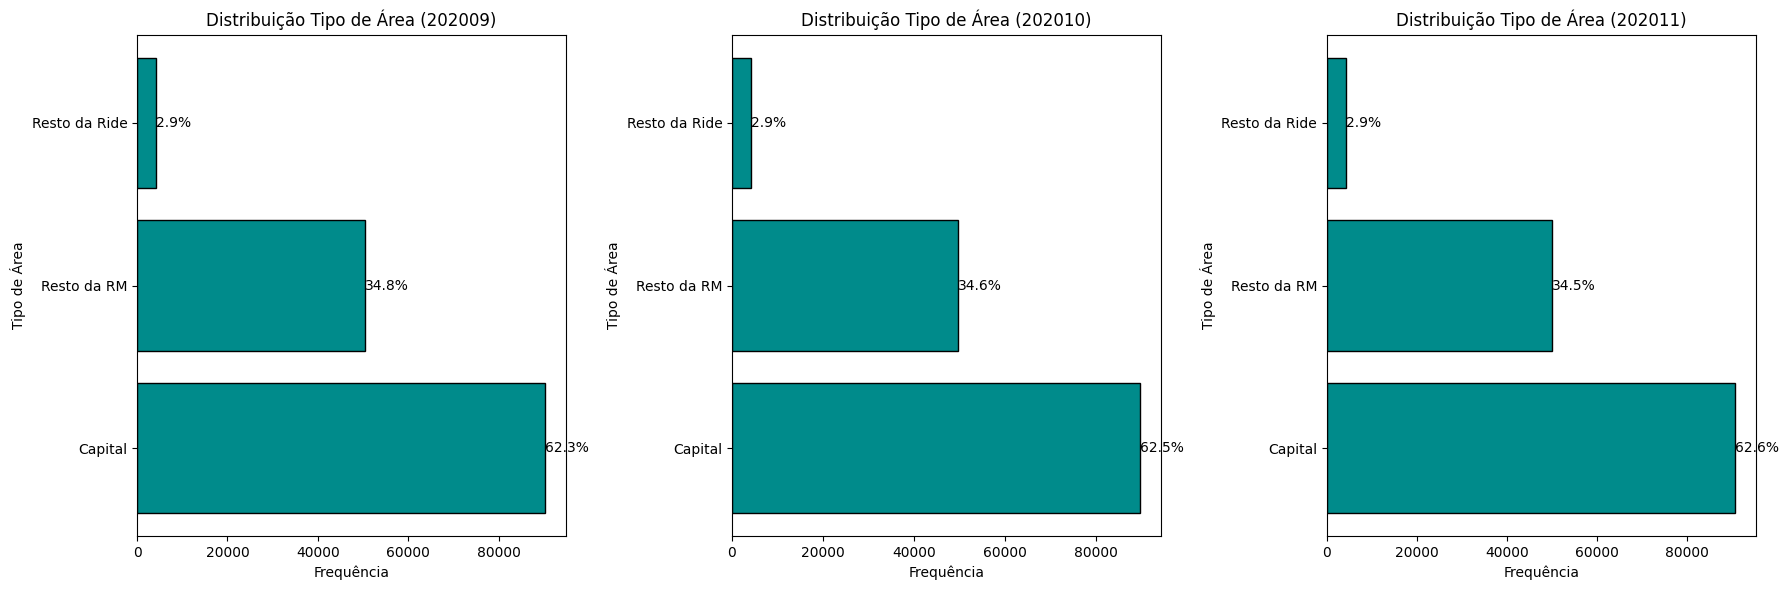

In [40]:
tipo_area_subplots(df_pnad_09, df_pnad_10, df_pnad_11)

In [24]:
df_pnad_covid['A002'].value_counts()

A002
33     794
40     792
39     782
34     776
41     751
      ... 
102     10
93       9
91       7
95       5
99       4
Name: count, Length: 98, dtype: int64

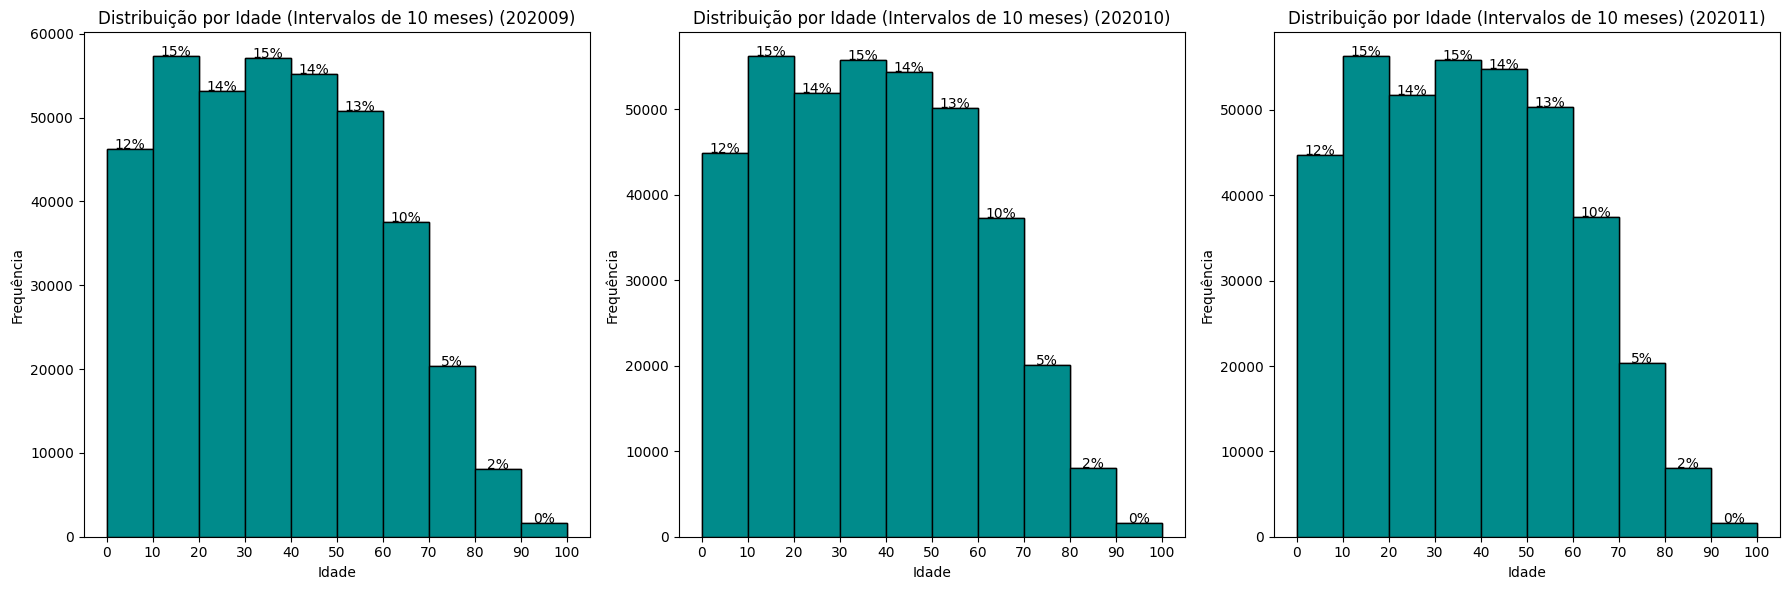

In [41]:
distribuicao_idade_subplots(df_pnad_09, df_pnad_10, df_pnad_11)

In [25]:
df_pnad_covid['A003'].value_counts()

A003
Mulher    18211
Homem     14711
Name: count, dtype: int64

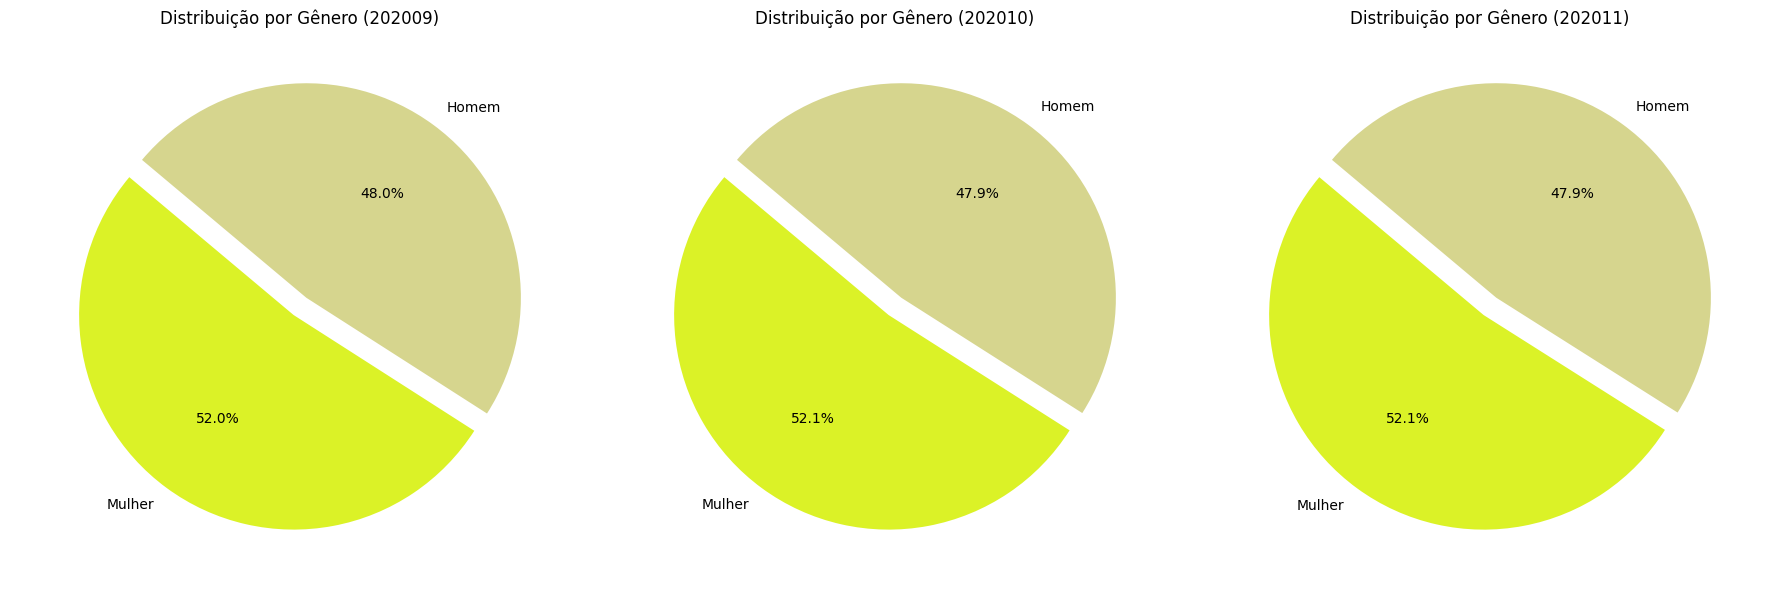

In [42]:
contagem_genero_subplots(df_pnad_09, df_pnad_10, df_pnad_11)

In [26]:
df_pnad_covid['A004'].value_counts()

A004
Parda       16571
Branca      13174
Preta        2773
Indígena      249
Amarela       136
Ignorado       19
Name: count, dtype: int64

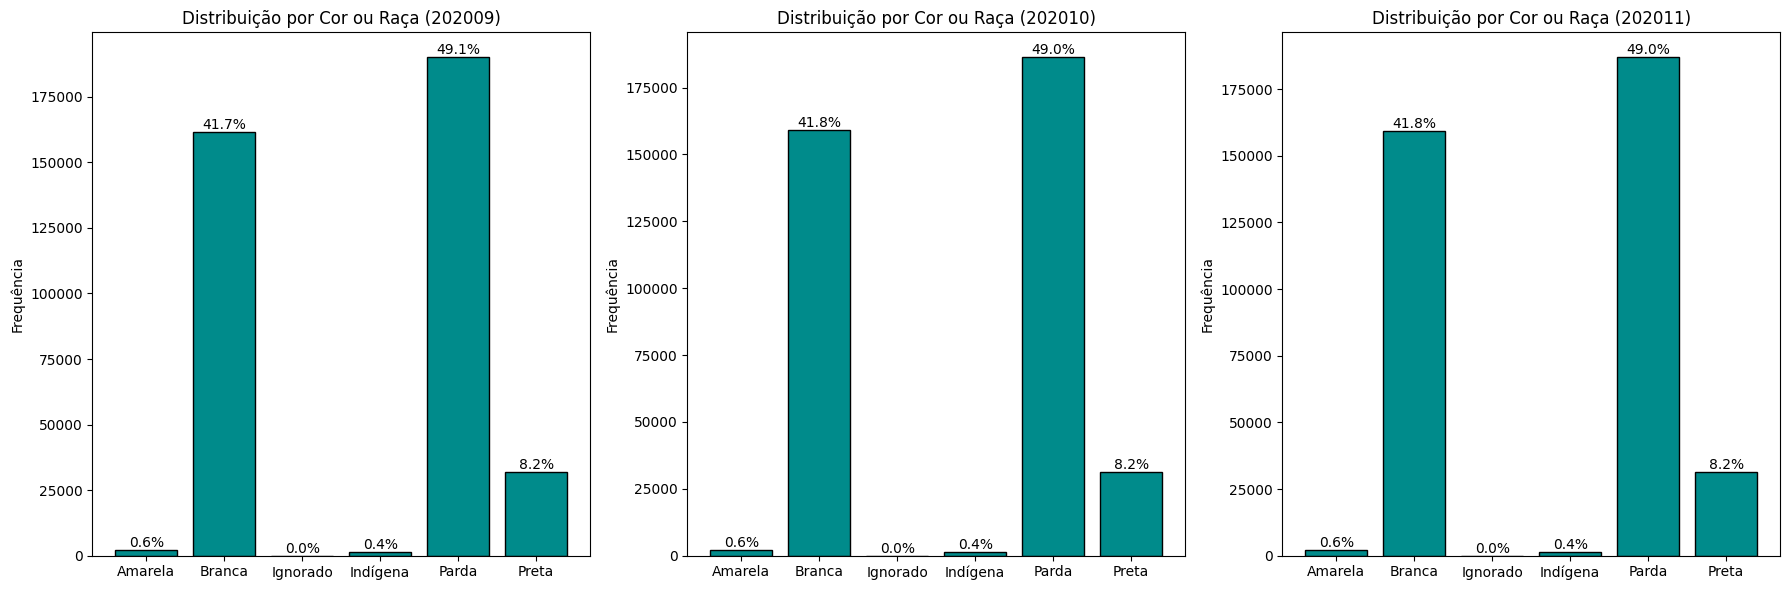

In [43]:
distribuicao_cor_ou_raca_subplots(df_pnad_09, df_pnad_10, df_pnad_11)

In [27]:
df_pnad_covid['A005'].value_counts()

A005
Médio completo                          9659
Fundamental incompleto                  6594
Superior completo                       5895
Superior incompleto                     2787
Médio incompleto                        2637
Fundamental completa                    1957
Pós-graduação, mestrado ou doutorado    1845
Sem instrução                           1548
Name: count, dtype: int64

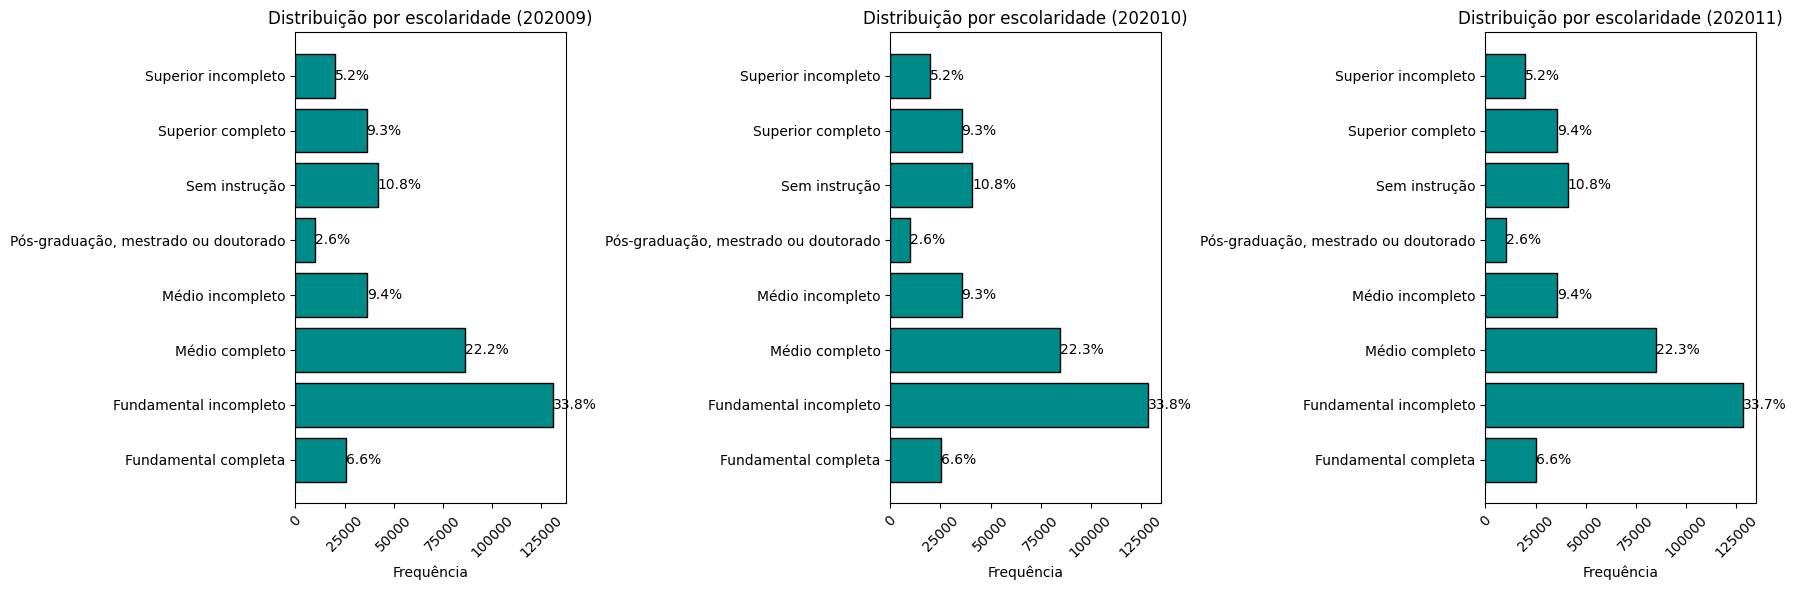

In [54]:
distribuicao_escolaridade_subplots(df_pnad_09, df_pnad_10, df_pnad_11)

In [28]:
df_pnad_covid['A006'].value_counts()

A006
-1.0    24829
 2.0     4226
 1.0     3867
Name: count, dtype: int64

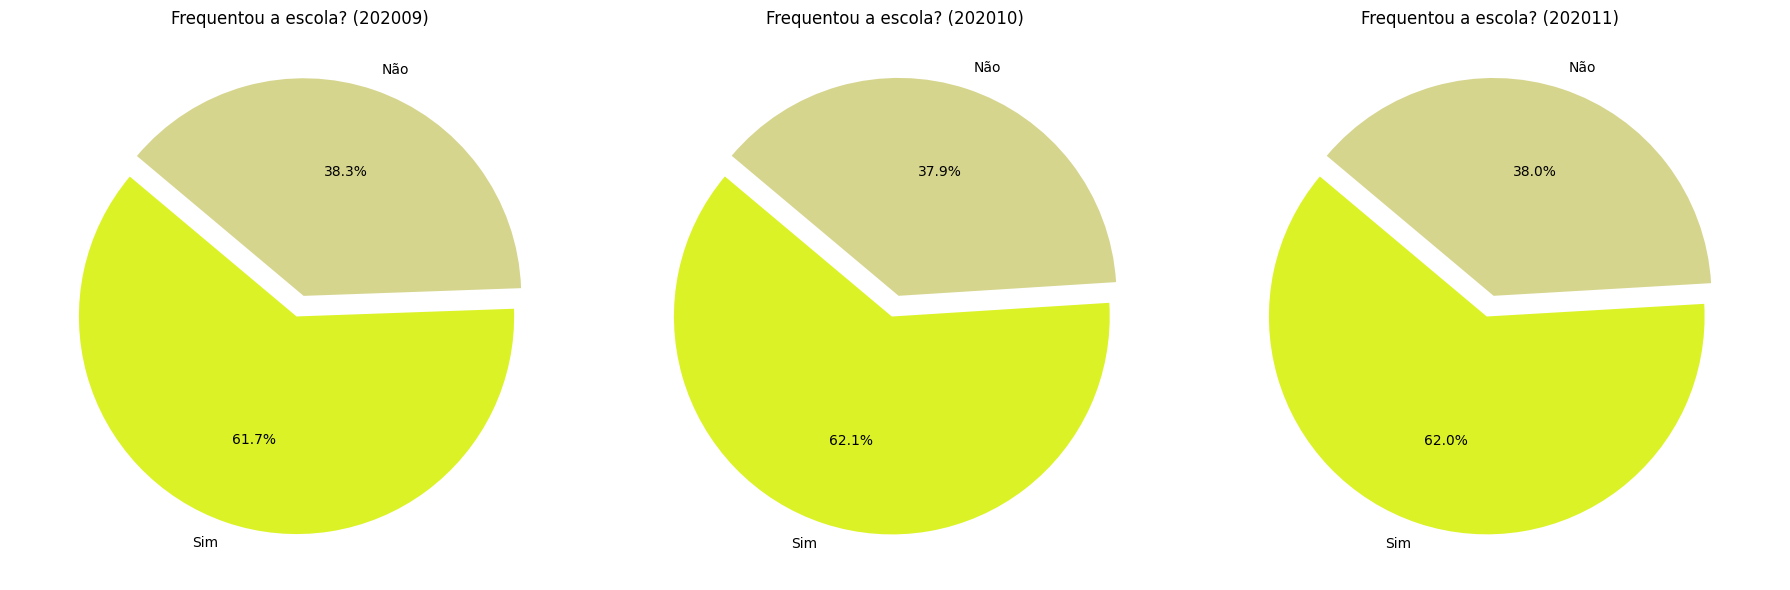

In [45]:
distribuicao_frequencia_escolar_subplots(df_pnad_09, df_pnad_10, df_pnad_11)

In [29]:
df_pnad_covid['A006B'].value_counts()

A006B
-1.0    10973
 3.0      980
 4.0      334
 2.0      116
 1.0       49
Name: count, dtype: int64

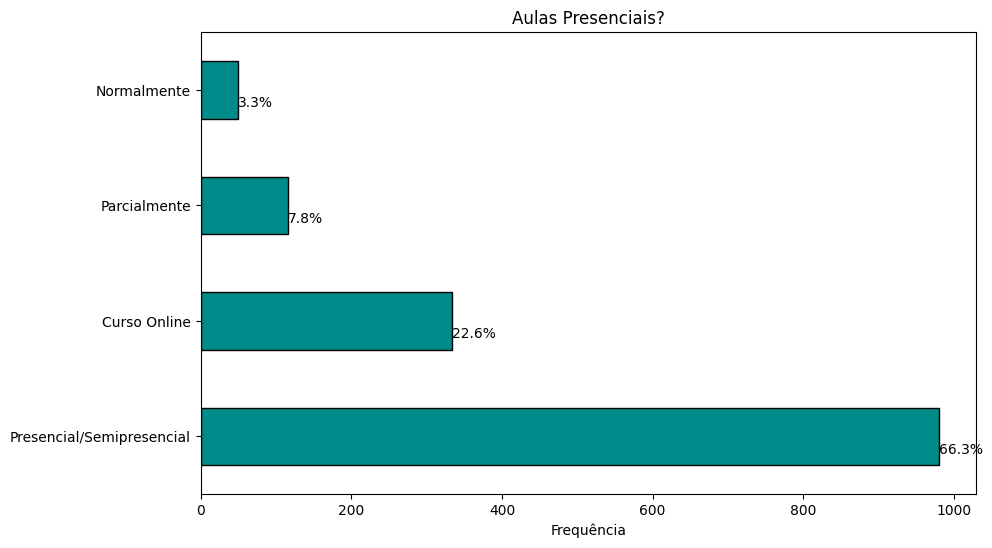

In [30]:
distribuicao_tipo_aulas_sumarizado(df_pnad_covid)